In [51]:
import pandas as pd
import janitor
import datetime
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx


In [66]:
df_orig = pd.read_csv("Connections.csv",skiprows=2)
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     515 non-null    object
 1   Last Name      515 non-null    object
 2   URL            515 non-null    object
 3   Email Address  2 non-null      object
 4   Company        486 non-null    object
 5   Position       486 non-null    object
 6   Connected On   518 non-null    object
dtypes: object(7)
memory usage: 28.5+ KB


In [67]:
df_comp = (df_orig
           .clean_names()
           .drop(columns = ['first_name','last_name','email_address','url'])
           .dropna(subset=['company', 'position'])
           .to_datetime('connected_on', format='%d %b %Y')
)
df_comp.head()


c:\Users\matt\.conda\envs\DataVis\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.transform_columns` instead.
  return method(self._obj, *args, **kwargs)


,company,position,connected_on
0,Jordan-Elbridge Central School District,Building Substitute Teacher,2025-02-24
1,SUNY Polytechnic Institute,Garduate Assistant,2025-02-23
2,"Ryder System, Inc.",Rental Management Trainee,2025-02-22
4,MJMR Consulting,Founder,2025-02-22
5,"Prime Medicine, Inc.",IT Infrastructure Co-op,2025-02-22


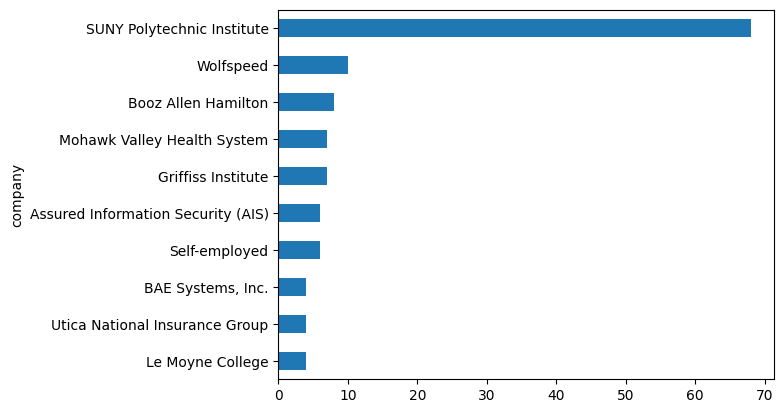

In [68]:
df_comp['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

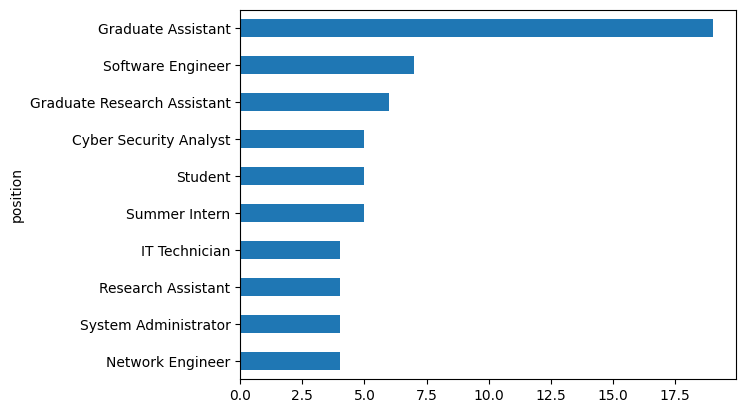

In [69]:
df_comp['position'].value_counts().head(10).plot(kind="barh").invert_yaxis();

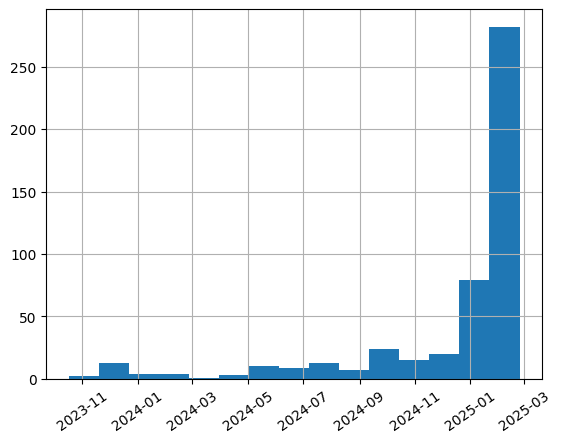

In [45]:
df_comp['connected_on'].hist(xrot=35, bins=15);

In [46]:
pattern = "freelance|self-employed"
df_comp_selc = df_comp[~df_comp['company'].str.contains(pattern, case=False)]

df_company = df_comp_selc['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(20)


,company,count
0,SUNY Polytechnic Institute,68
1,Wolfspeed,10
2,Booz Allen Hamilton,8
3,Mohawk Valley Health System,7
4,Griffiss Institute,7
5,Assured Information Security (AIS),6
6,Utica National Insurance Group,4
7,"BAE Systems, Inc.",4
8,Le Moyne College,4
9,Syracuse University,4


In [47]:
df_position = df_comp_selc['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(20)

,position,count
0,Graduate Assistant,19
1,Software Engineer,7
2,Graduate Research Assistant,6
5,Cyber Security Analyst,5
4,Summer Intern,5
3,Student,5
9,Network Engineer,4
8,System Administrator,4
7,Research Assistant,4
6,IT Technician,4


In [ ]:
df_comp['company'].head(20)


0           Jordan-Elbridge Central School District
1                        SUNY Polytechnic Institute
2                                Ryder System, Inc.
4                                   MJMR Consulting
5                              Prime Medicine, Inc.
6                                       LTIMindtree
8                        SUNY Polytechnic Institute
9                                         Wolfspeed
10                                    Self-employed
11                                       M.A. Polce
13                       SUNY Polytechnic Institute
14                         Oneida County Government
15                              Booz Allen Hamilton
16                              Booz Allen Hamilton
17                       SUNY Polytechnic Institute
18                       SUNY Polytechnic Institute
19                      Black River Systems Company
20    NYS Office of Information Technology Services
21                                      BAE Systems
22          

In [58]:
df_comp = df_comp.sample(n=10)
df_comp.head()

,company,position,connected_on
0,Jordan-Elbridge Central School District,Building Substitute Teacher,2025-02-24
23,Usherwood Office Technology,Cyber Security Analyst,2025-02-18
50,SUNY Polytechnic Institute,Resident Advisor,2025-02-13
1,SUNY Polytechnic Institute,Garduate Assistant,2025-02-23
55,SUNY Polytechnic Institute,Graduate Assistant,2025-02-13


number of nodes: 4
number of edges: 3


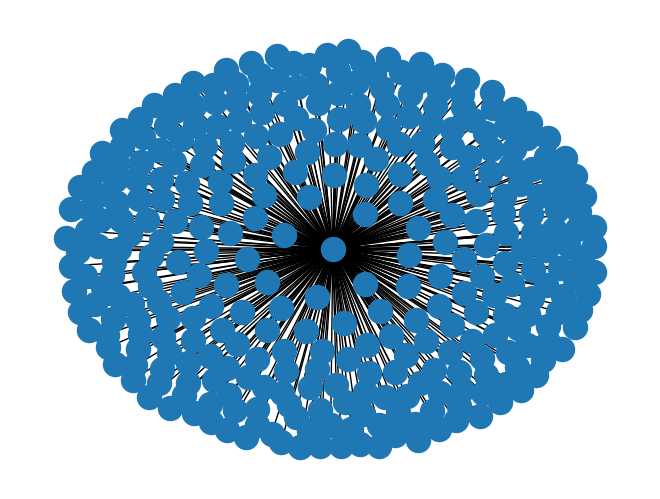

In [62]:
g = nx.Graph()
g.add_node(0, label = "root") # intialize yourself as central node
g.add_node(1, label = "Company 1", size=10, title="info1")
g.add_node(2, label = "Company 2", size=40, title="info2")
g.add_node(3, label = "Company 3", size=60, title="info3")
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)



print(f"number of nodes: {g.number_of_nodes()}")
print(f"number of edges: {g.number_of_edges()}")

g = nx.Graph()
g.add_node('root') 


for _, row in df_company.iterrows():

 
  company = row['company']
  count = row['count']

  title = f"{company} – {count}"
  positions = set([x for x in df_comp[company == df_comp['company']]['position']])
  positions = ''.join('{}'.format(x) for x in positions)

  position_list = f"{positions}"
  hover_info = title + position_list

  g.add_node(company, size=count*2, title=hover_info, color='#3449eb')
  g.add_edge('root', company, color='grey')

nx.draw_spring(g)
plt.show(g)
#nt = net.Network(notebook=True, height='900px', width='1024px', bgcolor="black", font_color='white')
#nt.from_nx(g)
#nt.hrepulsion()
#nt.show('company_graph.html')